# BINGO CELL IMG CLASSIFICATION

### GPU check

In [14]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2022-01-10 13:26:13.281710: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 13:26:13.282747: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 13:26:13.283573: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 13:26:13.284549: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 13:26:13.285375: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3241265941906756449
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2156003328
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10527721493596971380
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

### Import Libraries

In [15]:
import matplotlib.pyplot as plt
import datetime
from keras.utils.vis_utils import plot_model
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os
import time

### Parameters

In [16]:
# info
IMG_SIZE = (80, 80)
MODEL_SAVE_DIR = "./model"
TRAINING_DIR = "./train-dataset"
VALIDATION_DIR = "./valid-dataset"
NUM_CLASSES = 75

# params
data_generator_param = {
    "rescale": 1 / 256,  # 各ピクセルの値を0以上1以下に正規化(一般的な画像データは256階調で画素の明るさを表現しているから)
    "rotation_range": 5,
    "width_shift_range": 0.05,
    "height_shift_range": 0.05,
    "shear_range": 0.05,
    "zoom_range": 0.05,
    "fill_mode": "nearest",
}
TRAIN_BATCHSIZE = 1
VAL_BATCHSIZE = 1

LOSS = 'categorical_crossentropy'
OPTIMIZER = 'rmsprop'
METRICS = 'accuracy'

EPOCHS = 100
STEPS_PER_EPOCH = 1260
VERBOSE = 1
VALIDATION_STEPS = 225

In [17]:
training_datagenerator = ImageDataGenerator(**data_generator_param)
validation_datagenerator = ImageDataGenerator(**data_generator_param)
generated_train_data = training_datagenerator.flow_from_directory(  # training_datagenの定義を用いて写真を変更し保存
    TRAINING_DIR,  # 学習する画像のフォルダを指定
    target_size=IMG_SIZE,  # 画像データのサイズ
    # "categorical"か"binary"か"sparse"か"input"か"other"か"None"のいずれか1つ．"categorical"は2次元のone-hotにエンコード化されたラベル
    class_mode='categorical',
    batch_size=TRAIN_BATCHSIZE  # batch_sizeはミニバッチ学習に使われるバッチのサイズ。
)
generated_vali_data = validation_datagenerator.flow_from_directory(
    VALIDATION_DIR,
    target_size=IMG_SIZE,
    class_mode='categorical',
    batch_size=VAL_BATCHSIZE
)

Found 1260 images belonging to 75 classes.
Found 225 images belonging to 75 classes.


### モデルの定義

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 78, 78, 64)        1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 39, 39, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 20736)             0         
                                                                 
 dropout_3 (Dropout)         (None, 20736)            

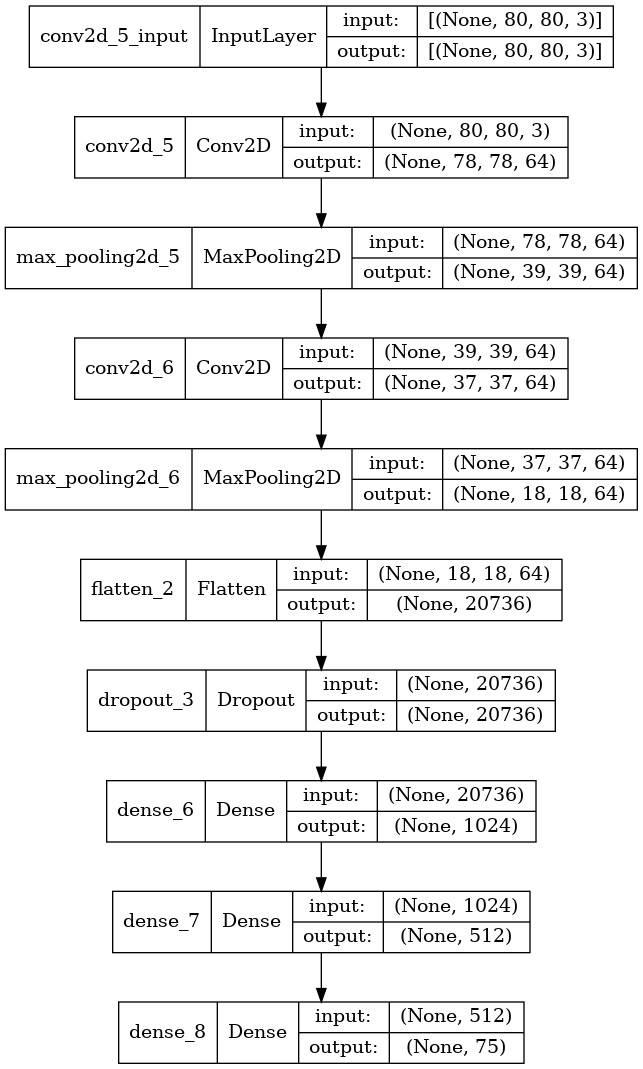

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        64, (3, 3), activation='relu', input_shape=(
            80, 80, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])
model.summary()

date_now = str(datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
plot_model(model, to_file=f'{MODEL_SAVE_DIR}/' + date_now + "_model.png", show_shapes=True)

### 学習

In [19]:
start_time = time.time()
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=[METRICS])
history = model.fit(generated_train_data,
                    epochs=EPOCHS,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    validation_data=generated_vali_data,
                    verbose=VERBOSE,
                    validation_steps=VALIDATION_STEPS
                    )
print(f"{(time.time()-start_time)/60} min")

Epoch 1/100
1260/1260 [==============================] - 30s 23ms/step - loss: 4.3346 - accuracy: 0.0310 - val_loss: 4.4686 - val_accuracy: 0.0133
Epoch 2/100
1260/1260 [==============================] - 29s 23ms/step - loss: 4.2383 - accuracy: 0.0389 - val_loss: 4.3653 - val_accuracy: 0.0133
Epoch 3/100
1260/1260 [==============================] - 29s 23ms/step - loss: 4.2091 - accuracy: 0.0389 - val_loss: 4.4166 - val_accuracy: 0.0133
Epoch 4/100
1260/1260 [==============================] - 29s 23ms/step - loss: 4.1000 - accuracy: 0.0460 - val_loss: 4.4057 - val_accuracy: 0.0267
Epoch 5/100
1260/1260 [==============================] - 29s 23ms/step - loss: 3.9114 - accuracy: 0.0722 - val_loss: 4.2228 - val_accuracy: 0.0400
Epoch 6/100
1260/1260 [==============================] - 29s 23ms/step - loss: 3.6424 - accuracy: 0.0984 - val_loss: 4.1960 - val_accuracy: 0.0889
Epoch 7/100
1260/1260 [==============================] - 29s 23ms/step - loss: 3.4121 - accuracy: 0.1556 - val_loss: 3

### 精度の確認

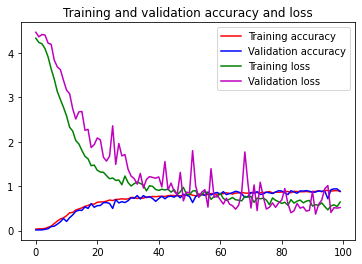

In [20]:
model.save(
    os.path.join(
        MODEL_SAVE_DIR,
        date_now +
        "_model.h5"))  # モデルの保存(h5形式)



acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.plot(epochs, loss, 'g', label="Training loss")
plt.plot(epochs, val_loss, 'm', label="Validation loss")
plt.title('Training and validation accuracy and loss')
plt.legend(loc=0)
plt.savefig(f'{MODEL_SAVE_DIR}/' + date_now + '_acc.png')
plt.show()


49.899484972159065 min
